## Implementation

### Problem

In [1]:
import numpy as np

MAX_JOB_DURATION = 20
MAX_JOB_FINISH = 100
MAX_WEIGHT = 10

def new_problem(n):    
    s = np.random.randint(0, MAX_JOB_FINISH - MAX_JOB_DURATION, n)
    d = np.random.randint(1, MAX_JOB_DURATION, n)
    f = s + d
    i = np.argsort(f)
    
    return s[i], f[i], np.random.randint(1, MAX_WEIGHT, n)

problem = new_problem(10)
problem

(array([ 5, 19, 16, 33, 35, 39, 40, 34, 74, 79]),
 array([15, 23, 31, 42, 46, 50, 51, 53, 86, 98]),
 array([7, 8, 9, 7, 3, 1, 5, 8, 4, 9]))

### Visulization

We use a rectangle to represent each job. The left edge is the start time and the right edge is the finish time. The height is in proportion to the weight of each job, which is also labeled on the right of each job.

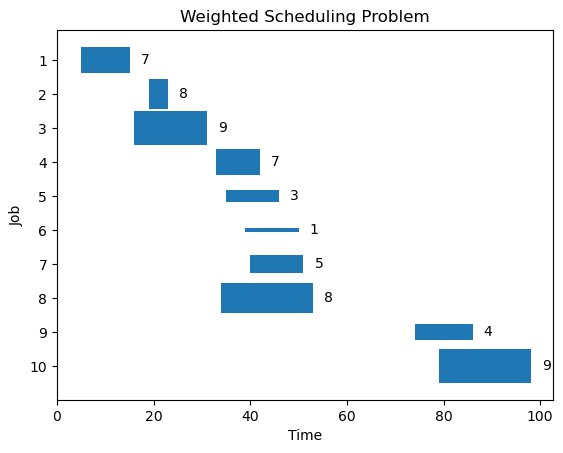

In [2]:
import matplotlib.pyplot as plt

def visualize(s, f, w):
    d = f - s
    i = np.arange(s.size) + 1
    hbars = plt.barh(i, d, height=w / w.max(), left=s)
    plt.bar_label(hbars, labels=w, padding=8)
    plt.title("Weighted Scheduling Problem")
    plt.xlabel("Time")
    plt.ylabel("Job")
    plt.xlim(0)
    plt.yticks(i)
    plt.gca().invert_yaxis()

visualize(*problem)

### Dynamic Programming Algorithm

In [3]:
def dynamic_programming(s, f, w):
    l = np.argmax(s.reshape(-1, 1) < f, axis=1) - 1
    W = np.zeros_like(s)
    
    def compute_W(k):
        if k == -1:
            return 0
        if W[k] == 0:
            W[k] = max(compute_W(l[k]) + w[k], compute_W(k - 1))
        return W[k]
    
    return compute_W(s.size - 1)

print(dynamic_programming(*problem))

33
